# Analisando dados relacionados a extração de ouro e fazendo modelos de previsão de concentração final

O objetivo dessa analise é descobrir como a concentração e tamanho de diferentes substancias muda em diferentes etapas da purificação de ouro e fazer modelos que prevejam a concentração final de ouro baseado nas metricas iniciais disponiveis

## Inicializando dados

### Carregando bibliotecas

In [35]:

import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

### Caregando dados

In [36]:
train_data=pd.read_csv('/Users/matheus/Mining_company_analysis_Matheus/data/raw/gold_recovery_train.csv')
test_data=pd.read_csv('/Users/matheus/Mining_company_analysis_Matheus/data/raw/gold_recovery_test.csv')
full_data=pd.read_csv('/Users/matheus/Mining_company_analysis_Matheus/data/raw/gold_recovery_full.csv')

### Visualizando dados

In [37]:
print('training data:')
train_data.info()
train_data.describe()

training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [38]:
print('testing data:')
test_data.info()
test_data.describe()

testing data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [39]:
print('full data:')
full_data.info()
full_data.describe()

full data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-nul

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


### Calculando as proporções de concentrado de ouro em diferentes etapas nos dados de treinamento

In [40]:
def conc_start(data):
    con=data['rougher.input.feed_au']+data['rougher.input.feed_sol']+data['rougher.input.feed_pb']+data['rougher.input.feed_ag']
    con=data['rougher.input.feed_au']/con
    return con
train_conc_rough_input=conc_start(train_data)
print(train_conc_rough_input)
train_conc_rough_input.describe()

0        0.125506
1        0.127886
2        0.125711
3        0.119820
4        0.118341
           ...   
16855    0.099894
16856    0.090111
16857    0.082892
16858    0.080751
16859    0.081545
Length: 16860, dtype: float64


count    15293.000000
mean         0.144439
std          0.031553
min          0.033301
25%          0.124321
50%          0.140136
75%          0.160552
max          0.398720
dtype: float64

In [41]:
#proporção no concentrado apos a flotação
def conc_output1(data):
    con=data['rougher.output.concentrate_au']+data['rougher.output.concentrate_sol']+data['rougher.output.concentrate_pb']+data['rougher.output.concentrate_ag']
    con=data['rougher.output.concentrate_au']/con
    return con
train_conc_rough_output1=conc_output1(train_data)
print(train_conc_rough_output1)
train_conc_rough_output1.describe()

0        0.297988
1        0.299212
2        0.298578
3        0.293840
4        0.291558
           ...   
16855    0.262831
16856    0.261434
16857    0.272882
16858    0.257722
16859    0.256013
Length: 16860, dtype: float64


count    15205.000000
mean         0.288556
std          0.022966
min          0.056831
25%          0.274860
50%          0.288369
75%          0.301635
max          0.478619
dtype: float64

In [42]:
#proporção nos restos apos a flotação
def conc_output2(data):
    con=data['rougher.output.tail_au']+data['rougher.output.tail_sol']+data['rougher.output.tail_pb']+data['rougher.output.tail_ag']
    con=data['rougher.output.tail_au']/con
    return con
train_conc_rough_output2=conc_output2(train_data)
print(train_conc_rough_output2)
train_conc_rough_output2.describe()

0        0.045286
1        0.046206
2        0.045841
3        0.042165
4        0.039949
           ...   
16855    0.033669
16856    0.034200
16857    0.028912
16858    0.023130
16859    0.023367
Length: 16860, dtype: float64


count    14610.000000
mean         0.068688
std          0.027567
min          0.000889
25%          0.050090
50%          0.068690
75%          0.086327
max          0.257282
dtype: float64

In [43]:
#proporção no concentrado final
def conc_final(data):
    con=data['final.output.concentrate_au']+data['final.output.concentrate_sol']+data['final.output.concentrate_pb']+data['final.output.concentrate_ag']
    con=data['final.output.concentrate_au']/con
    return con
train_conc_final=conc_final(train_data)
print(train_conc_final)
train_conc_final.describe()

0        0.662934
1        0.667654
2        0.663298
3        0.671504
4        0.668297
           ...   
16855    0.685975
16856    0.686448
16857    0.685892
16858    0.680467
16859    0.677356
Length: 16860, dtype: float64


count    15226.000000
mean         0.630453
std          0.076062
min          0.055083
25%          0.615654
50%          0.646211
75%          0.668758
max          0.771500
dtype: float64

### Calculando a quantidade retirada

O calculo da retirada e feito por $$ C(F-T)/F(C-T) $$ com: 

C — proporção de ouro no concentrado logo após a flotação /após a purificação 

F — a proporção de ouro alimentado no sistema antes da flotação / quantidade no concentrado logo após a flotação 

T — a proporção de ouro nos restos de minério bruto logo após a flotação / quantidade após a purificação 

In [44]:
C=train_data['rougher.output.concentrate_au']
F=train_data['rougher.input.feed_au']
T=train_data['rougher.output.tail_au']
up=C*(F-T)
down=F*(C-T)
recovery=up/down*100
print(recovery.quantile(0.003))
print(recovery.quantile(0.997))
print(recovery.isnull().sum())
recovery.describe()

-816.5608173568319
123.21138884395499
2283


/Users/matheus/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


count    1.457700e+04
mean              NaN
std               NaN
min              -inf
25%      7.965104e+01
50%      8.521533e+01
75%      9.019726e+01
max               inf
dtype: float64

#### Calculando EAM entre o calculado e os valores reais das caracteristicas

In [45]:
#Eliminando valores nulos
recovery_predicted=recovery.dropna()
recovery_target=train_data['rougher.output.recovery'].dropna()
#usando somente linhas presentes em ambos
recovery_target=recovery_target[recovery_target.index.isin(recovery_predicted.index)]
recovery_predicted=recovery_predicted[recovery_predicted.index.isin(recovery_target.index)]
print(mean_absolute_error(recovery_target,recovery_predicted))

9.303415616264301e-15


O valor de erro absoluto foi extremamente baixo,então os dados foram calculdados corretamente

### Analisando valores não presentes no conjunto teste

In [46]:
print(set(full_data) - set(test_data))

{'final.output.concentrate_sol', 'rougher.output.tail_ag', 'rougher.output.tail_au', 'secondary_cleaner.output.tail_ag', 'final.output.tail_pb', 'primary_cleaner.output.tail_au', 'rougher.output.concentrate_sol', 'primary_cleaner.output.tail_sol', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'final.output.tail_ag', 'primary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_au', 'rougher.output.tail_sol', 'secondary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_sol', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'final.output.tail_au', 'final.output.concentrate_ag', 'primary_cleaner.output.tail_ag', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'final.output.concentrate_pb', 'rougher.output.concentrate_au', 'rougher.calculation.au_pb_ratio', 'rougher.calculation.sulfate_to_au_concentrate', 'final.output.tail_sol', 'final.output.concentrate_au', 'rougher.

Parece que no conjunto de treino não temos a metrica alvo, varios dos parametros calculados ou proporções e falta varias das metricas de restos em varios pontos do processo de purificação

### Pre-processamento dos dados

#### Processamento generalizado

In [47]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [48]:
essentials=['final.output.concentrate_au','rougher.output.concentrate_au','rougher.input.feed_au','rougher.output.tail_au','rougher.output.recovery']

#join não estava funcionando direito nas novas versões de python
columns=['final.output.concentrate_au', 'rougher.output.concentrate_au','rougher.output.tail_au','rougher.output.recovery','rougher.output.concentrate_sol','rougher.output.concentrate_pb','rougher.output.concentrate_ag','final.output.concentrate_sol','final.output.concentrate_pb','final.output.concentrate_ag']
for column in columns:
    ex_data=full_data.loc[test_data.index]
    test_data[column]=ex_data[column]

def general_preprocess(data):
    data=data.drop_duplicates()
    #caracteristicas necessarias para analise
    data=data.dropna(subset=essentials)
    return data
train_data=general_preprocess(train_data)
test_data=general_preprocess(test_data)
full_data=general_preprocess(full_data)

train_data=train_data[list(set(train_data)&set(test_data))]
test_data=test_data[list(set(train_data)&set(test_data))]

test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5010 entries, 0 to 5855
Data columns (total 63 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   secondary_cleaner.state.floatbank3_a_level  5010 non-null   float64
 1   rougher.state.floatbank10_b_level           5010 non-null   float64
 2   rougher.state.floatbank10_d_level           5010 non-null   float64
 3   primary_cleaner.input.xanthate              4881 non-null   float64
 4   secondary_cleaner.state.floatbank3_a_air    4996 non-null   float64
 5   final.output.concentrate_sol                4782 non-null   float64
 6   secondary_cleaner.state.floatbank5_b_level  5010 non-null   float64
 7   rougher.input.feed_au                       5010 non-null   float64
 8   primary_cleaner.input.depressant            4781 non-null   float64
 9   rougher.output.tail_au                      5010 non-null   float64
 10  primary_cleaner.s

## Analisando os dados

### Como a concentração de metais muda dependendo do estagio de purificação

In [49]:
def graphmaker(start,output,final):
    tplot=pd.DataFrame(data=[start.mean(),output.mean(),final.mean()],index=['start','output','final'])
    tplot.plot(grid=True,kind='bar')
    plt.ylabel('Concentração %')
    plt.title('Mudança com o avanço dos estagios')
    plt.show()

Concentração media de metais. muda por estagios:
materia prima: 12.039369076486041
flotação: 28.113102489140026
final: 54.281980814637905


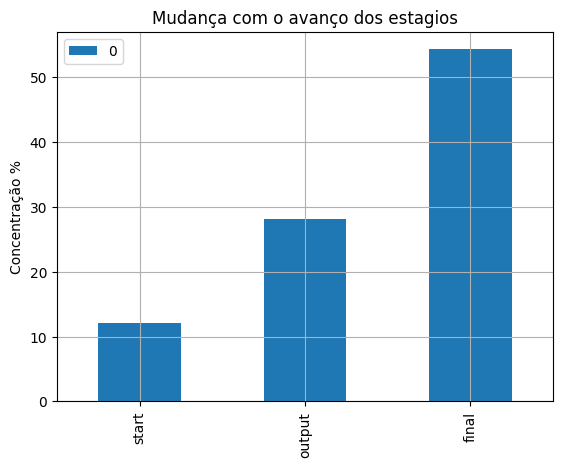

In [50]:
def metal_start(data):
    con=data['rougher.input.feed_au']+data['rougher.input.feed_sol']+data['rougher.input.feed_pb']+data['rougher.input.feed_ag']
    con=data['rougher.input.feed_au']+data['rougher.input.feed_pb']+data['rougher.input.feed_ag']/con
    return con
def metal_output(data):
    con=data['rougher.output.concentrate_au']+data['rougher.output.concentrate_sol']+data['rougher.output.concentrate_pb']+data['rougher.output.concentrate_ag']
    con=data['rougher.output.concentrate_au']+data['rougher.output.concentrate_pb']+data['rougher.output.concentrate_ag']/con
    return con
def metal_final(data):
    con=data['final.output.concentrate_au']+data['final.output.concentrate_sol']+data['final.output.concentrate_pb']+data['final.output.concentrate_ag']
    con=data['final.output.concentrate_au']+data['final.output.concentrate_pb']+data['final.output.concentrate_ag']/con
    return con
start=metal_start(full_data)
output=metal_output(full_data)
final=metal_final(full_data)
print('Concentração media de metais. muda por estagios:')
print('materia prima:',start.mean())
print('flotação:',output.mean())
print('final:',final.mean())
graphmaker(start,output,final)

Conforme as etapas avançam, a concentração de metais aumenta de forma exponencial

### Comparando as as distribuições de tamanho de partícula de treinamento a teste

In [51]:
#Eliminando valores nulos nas colunas essenciais
feed_training=train_data['rougher.input.feed_size'].dropna()
feed_test=test_data['rougher.input.feed_size'].dropna()
#usando somente linhas presentes em ambos
feed_test=feed_test[feed_test.index.isin(feed_training.index)]
feed_training=feed_training[feed_training.index.isin(feed_test.index)]
print('erro absoluto medio das previsões:')
print(mean_absolute_error(feed_test,feed_training))
print('media de tamanho de particulas treino:',feed_training.mean())
print('media de tamanho de particulas teste:',feed_test.mean())

erro absoluto medio das previsões:
14.725244927319272
media de tamanho de particulas treino: 54.4175918118662
media de tamanho de particulas teste: 56.57945308279633


A variação parece tender a ser particulas previstas como menores e a faixa de precisão ser dentro de 20% do valor de teste, ficando numa faixa de + ou - 7 do valor original

Consideraria aceitavel

### Analisando concentrações totais de todas as substancias em diferentes pontos

#### Ouro

Ouro nos dados de treino:
Concentração enquanto:
materia prima: 7.840134434922447
pos-flotação: 19.398801415901133
final do processo: 43.74919641988914
       rougher.input.feed_au  rougher.output.concentrate_au  \
count           14283.000000                   14283.000000   
mean                7.840134                      19.398801   
std                 1.952165                       3.857550   
min                 0.010000                       0.000000   
25%                 6.582031                      18.398075   
50%                 7.637921                      19.941980   
75%                 9.053681                      21.390209   
max                13.126043                      28.522811   

       final.output.concentrate_au  
count                 14283.000000  
mean                     43.749196  
std                       5.873926  
min                       0.000000  
25%                      43.230140  
50%                      44.858828  
75%                  

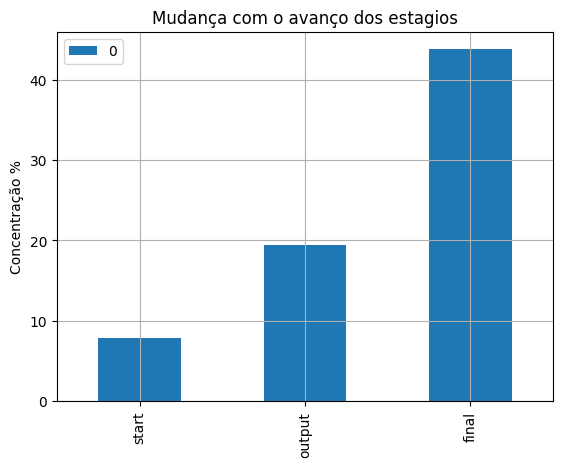

Ouro nos dados de teste:
Concentração enquanto:
materia prima: 8.616719171437428
pos-flotação: 20.07908817847333
final do processo: 43.03075725591264
       rougher.input.feed_au  rougher.output.concentrate_au  \
count            5010.000000                    5010.000000   
mean                8.616719                      20.079088   
std                 2.828891                       3.905071   
min                 0.000000                       0.000000   
25%                 7.616161                      19.062922   
50%                 9.285404                      20.561428   
75%                10.380655                      22.085518   
max                13.731330                      28.522811   

       final.output.concentrate_au  
count                  5010.000000  
mean                     43.030757  
std                       6.082101  
min                       0.000000  
25%                      42.123341  
50%                      44.218542  
75%                    

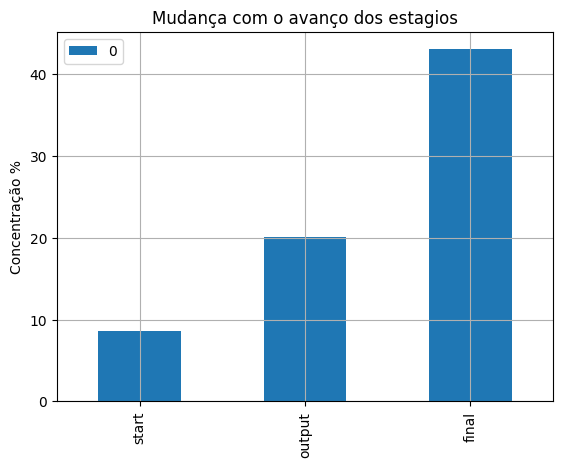

In [52]:
column=['rougher.input.feed_au','rougher.output.concentrate_au','final.output.concentrate_au']
def conc_full(data,column):
    print('Concentração enquanto:')
    print('materia prima:',data[column[0]].mean())
    print('pos-flotação:',data[column[1]].mean())
    print('final do processo:',data[column[2]].mean())
    print(data[column].describe())
    print()
    graphmaker(data[column[0]],data[column[1]],data[column[2]])
print('Ouro nos dados de treino:')
conc_full(train_data,column)
print('Ouro nos dados de teste:')
conc_full(test_data,column)

#### Sol

Sol nos dados de treino:
Concentração enquanto:
materia prima: 36.25350378854301
pos-flotação: 28.233315994914292
final do processo: 9.150610453373954
       rougher.input.feed_sol  rougher.output.concentrate_sol  \
count            14188.000000                    14257.000000   
mean                36.253504                       28.233316   
std                  5.089026                        6.235466   
min                  0.010000                        0.000000   
25%                 34.079736                       26.668462   
50%                 36.997910                       29.249121   
75%                 39.412675                       31.740840   
max                 48.363177                       38.351193   

       final.output.concentrate_sol  
count                  14055.000000  
mean                       9.150610  
std                        2.860176  
min                        0.000000  
25%                        7.457006  
50%                        8.825489

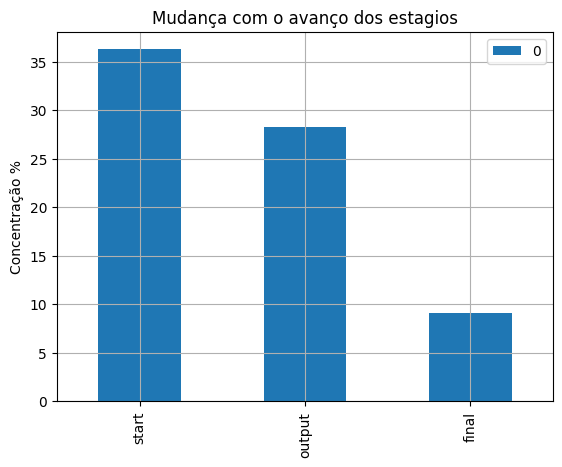

Sol nos dados de teste:
Concentração enquanto:
materia prima: 35.26592448151106
pos-flotação: 27.426957300262302
final do processo: 9.067152165995658
       rougher.input.feed_sol  rougher.output.concentrate_sol  \
count             4964.000000                     5002.000000   
mean                35.265924                       27.426957   
std                 10.994534                        6.232236   
min                  0.000000                        0.000000   
25%                 33.347931                       25.353138   
50%                 37.857207                       28.159600   
75%                 41.682731                       31.039806   
max                 53.477742                       38.239608   

       final.output.concentrate_sol  
count                   4782.000000  
mean                       9.067152  
std                        3.160965  
min                        0.000000  
25%                        7.582067  
50%                        8.981910 

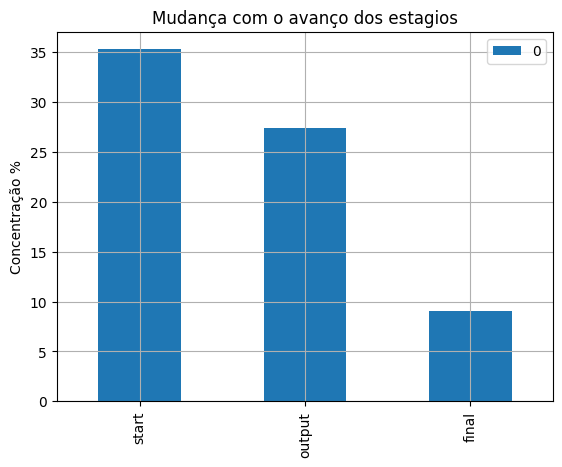

In [53]:
column=['rougher.input.feed_sol','rougher.output.concentrate_sol','final.output.concentrate_sol']
print('Sol nos dados de treino:')
conc_full(train_data,column)
print('Sol nos dados de teste:')
conc_full(test_data,column)

#### Chumbo (pb)

chumbo nos dados de treino:
Concentração enquanto:
materia prima: 3.5167512431283168
pos-flotação: 7.6489348918518525
final do processo: 10.07432702782239
       rougher.input.feed_pb  rougher.output.concentrate_pb  \
count           14160.000000                   14283.000000   
mean                3.516751                       7.648935   
std                 1.078210                       1.888192   
min                 0.008001                       0.000000   
25%                 2.775836                       6.842473   
50%                 3.419317                       7.756208   
75%                 4.223498                       8.601422   
max                 7.142594                      13.617072   

       final.output.concentrate_pb  
count                 14282.000000  
mean                     10.074327  
std                       1.804643  
min                       0.000000  
25%                       9.274365  
50%                      10.282734  
75%               

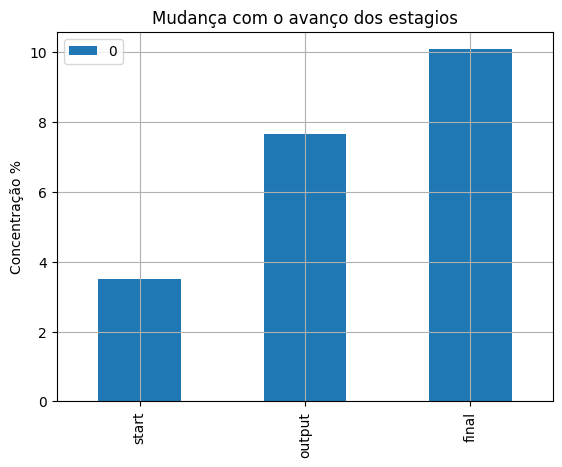

chumbo nos dados de teste:
Concentração enquanto:
materia prima: 3.5168347983478583
pos-flotação: 6.991586408133821
final do processo: 9.839673227847136
       rougher.input.feed_pb  rougher.output.concentrate_pb  \
count            5010.000000                    5010.000000   
mean                3.516835                       6.991586   
std                 1.327304                       1.481743   
min                 0.000000                       0.000000   
25%                 3.022657                       6.458641   
50%                 3.671375                       7.175658   
75%                 4.241164                       7.790405   
max                 6.905684                      12.253356   

       final.output.concentrate_pb  
count                  5009.000000  
mean                      9.839673  
std                       1.828037  
min                       0.000000  
25%                       8.991446  
50%                      10.067045  
75%                 

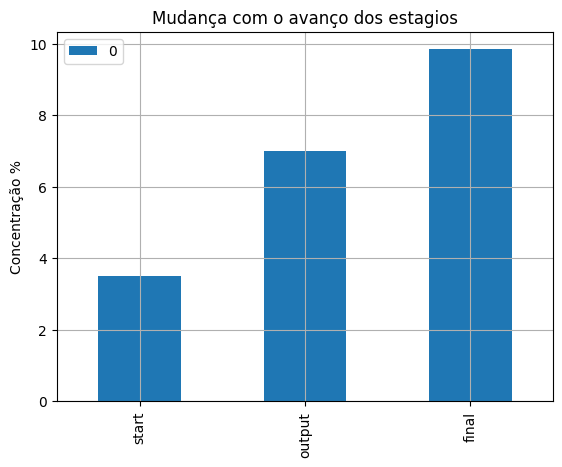

In [54]:
column=['rougher.input.feed_pb','rougher.output.concentrate_pb','final.output.concentrate_pb']
print('chumbo nos dados de treino:')
conc_full(train_data,column)
print('chumbo nos dados de teste:')
conc_full(test_data,column)

Parece que a concetração de chumbo sobe com o tempo junto com a de ouro,talvez por tambem ser um metal pesado

#### Prata (ag)

Prata nos dados de treino:
Concentração enquanto:
materia prima: 8.561652741411388
pos-flotação: 11.75695167516443
final do processo: 5.120965478507627
       rougher.input.feed_ag  rougher.output.concentrate_ag  \
count           14283.000000                   14283.000000   
mean                8.561653                      11.756952   
std                 1.910259                       2.783695   
min                 0.010000                       0.000000   
25%                 7.123689                      10.473738   
50%                 8.144834                      11.743457   
75%                 9.905504                      13.431804   
max                14.596026                      24.480271   

       final.output.concentrate_ag  
count                 14282.000000  
mean                      5.120965  
std                       1.419937  
min                       0.000000  
25%                       4.200909  
50%                       4.987897  
75%                  

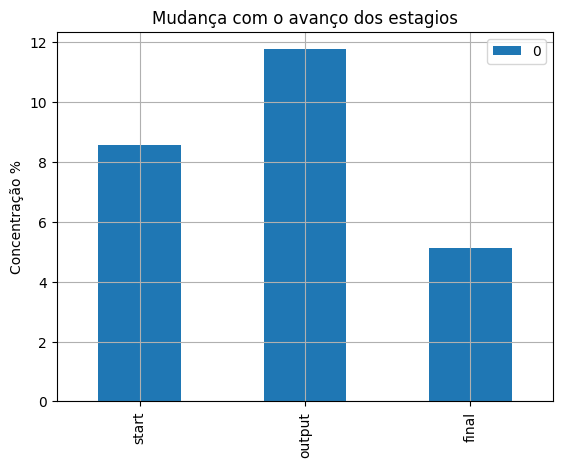

Prata nos dados de teste:
Concentração enquanto:
materia prima: 8.657366531642268
pos-flotação: 11.448789197537849
final do processo: 5.4381746788352805
       rougher.input.feed_ag  rougher.output.concentrate_ag  \
count            5010.000000                    5010.000000   
mean                8.657367                      11.448789   
std                 3.030631                       2.738560   
min                 0.000000                       0.000000   
25%                 7.442577                      10.130471   
50%                 9.499425                      11.317706   
75%                10.616632                      12.971832   
max                14.239991                      24.480271   

       final.output.concentrate_ag  
count                  5009.000000  
mean                      5.438175  
std                       1.596354  
min                       0.000000  
25%                       4.444374  
50%                       5.220384  
75%                 

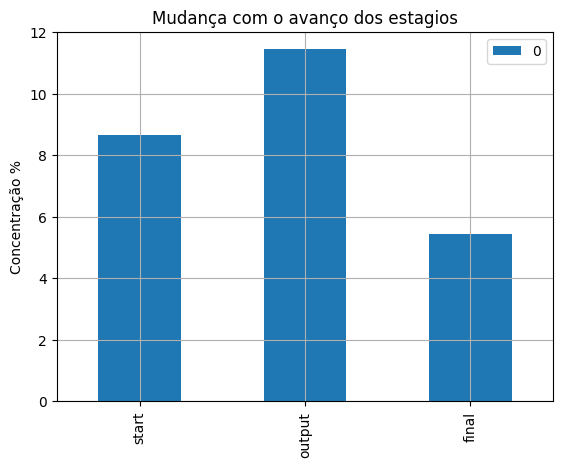

In [55]:
column=['rougher.input.feed_ag','rougher.output.concentrate_ag','final.output.concentrate_ag']
print('Prata nos dados de treino:')
conc_full(train_data,column)
print('Prata nos dados de teste:')
conc_full(test_data,column)

## Treinando modelos

### Calculando sMAPE

In [56]:
def SMAPE(F,A):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

### Separando objetivos e features

In [57]:
#habiltando o uso de todas as variaveis para o modelo
train_data=train_data.dropna()
test_data=test_data.dropna()
#tirando todas as variaveis em features de etapas depois de input na parte de concentração de materia prima
to_drop=['date','rougher.output.concentrate_au','rougher.output.concentrate_ag','rougher.output.concentrate_pb','rougher.output.concentrate_sol','final.output.concentrate_au','final.output.concentrate_ag','final.output.concentrate_pb','final.output.concentrate_sol','rougher.output.recovery']
train_features=train_data.drop(to_drop,axis=1)
train_target_rougher=train_data['rougher.output.concentrate_au']
train_target_final=train_data['final.output.concentrate_au']
test_features=test_data.drop(to_drop,axis=1)
test_target_rougher=test_data['rougher.output.concentrate_au']
test_target_final=test_data['final.output.concentrate_au']

### Treinando diferentes modelos

#### Regressão de arvore de decisão

In [58]:
best_score_rougher=100
best_score_final=100
best_depth_rougher=0
best_depth_final=0
for depth in range(1,40):
    model=DecisionTreeRegressor(random_state=12345,max_depth=depth)
    model.fit(train_features,train_target_rougher)
    prediction_test_rougher=model.predict(test_features)
    score=SMAPE(prediction_test_rougher,test_target_rougher)
    if(score<best_score_rougher):
        best_score_rougher=score
        best_depth_rougher=depth
    model=DecisionTreeRegressor(random_state=12345,max_depth=depth)
    model.fit(train_features,train_target_final)
    prediction_test_final=model.predict(test_features)
    score=SMAPE(prediction_test_final,test_target_final)
    if(score<best_score_final):
        best_score_final=score
        best_depth_final=depth
print('Rougher results:')
print('Best sMAPE:',best_score_rougher)
print('Best depth:',best_depth_rougher)
print()
print('Final results:')
print('Best sMAPE:',best_score_final)
print('Best depth:',best_depth_final)
print()
print('Final smape:', 0.25 * best_score_rougher + 0.75 * best_score_final)

Rougher results:
Best sMAPE: 14.94425981890121
Best depth: 2

Final results:
Best sMAPE: 8.52754685101454
Best depth: 1

Final smape: 10.131725092986207


Precisão melhor ou quase identica aos outros modelos com pouca complexidade, o modelo que escolheria usar

#### Regressão de floresta de decisão

In [59]:
best_score_rougher=100
best_score_final=100
best_depth_rougher=0
best_depth_final=0
best_n_estimators_rougher=0
best_n_estimators_final=0
for est in range(1,5):
    for depth in range(1,5):
        model=RandomForestRegressor(random_state=12345,max_depth=depth,n_estimators=est)
        model.fit(train_features,train_target_rougher)
        prediction_test_rougher=model.predict(test_features)
        score=SMAPE(prediction_test_rougher,test_target_rougher)
        if(score<best_score_rougher):
            best_score_rougher=score
            best_depth_rougher=depth
            best_n_estimators_rougher=est
        model=RandomForestRegressor(random_state=12345,max_depth=depth,n_estimators=est)
        model.fit(train_features,train_target_final)
        prediction_test_final=model.predict(test_features)
        score=SMAPE(prediction_test_final,test_target_final)
        if(score<best_score_final):
            best_score_final=score
            best_depth_final=depth
            best_n_estimators_final=est
print('Rougher results:')
print('Best sMAPE:',best_score_rougher)
print('Best number of estimators:',best_n_estimators_rougher)
print('Best depth:',best_depth_rougher)
print()
print('Final results:')
print('Best sMAPE final:',best_score_final)
print('Best number of estimators final:',best_n_estimators_final)
print('Best depth final:',best_depth_final)
print()
print('Final smape:', 0.25 * best_score_rougher + 0.75 * best_score_final)

Rougher results:
Best sMAPE: 14.352124317394939
Best number of estimators: 1
Best depth: 3

Final results:
Best sMAPE final: 8.50946237024592
Best number of estimators final: 1
Best depth final: 2

Final smape: 9.970127857033175


Quase identico ao modelo de arvore na pontuação, mas muito mais complexo e lento, não o usaria

#### Regressão linear

In [60]:
best_score_rougher=100
best_score_final=100

model=LinearRegression()
model.fit(train_features,train_target_rougher)
prediction_test_rougher=model.predict(test_features)
score_rougher=SMAPE(prediction_test_rougher,test_target_rougher)
model=LinearRegression()
model.fit(train_features,train_target_final)
prediction_test_final=model.predict(test_features)
score_final=SMAPE(prediction_test_final,test_target_final)
print('Rougher results:')
print('Best sMAPE:',score_rougher)
print()
print('Final results:')
print('Best sMAPE:',score_final)
print()
print('Final smape:', 0.25 * score_rougher + 0.75 * score_final)

Rougher results:
Best sMAPE: 18.03036166028769

Final results:
Best sMAPE: 10.247647478903058

Final smape: 12.193326024249217


O pior modelo, com precisão significativamente menor que os outros

# Conclusão

Os metais pesados, ouro e chumbo, aumentam e concentração conforme a purificação continua, enquanto a prata diminui em concentração da flotação ate a etapa final.

O tamanho de particulas não varia o sufiente do treinamento para teste para descartar a metrica.

O melhor modelo para classificar a concentração de ouro final é o de arvore, por ter precisão quase identica com o modelo de floresta, mas ser muito mais rapido